In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

In [ ]:
df = pd.read_csv('..data/sheb_2020-2024.csv')
df['day'] = pd.to_datetime(df['day'])
df = df.set_index('day')
df.head()

,station,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,precip_in,avg_wind_speed_kts,avg_wind_drct,min_rh,avg_rh,max_rh,snow_in,max_wind_speed_kts,max_wind_gust_kts,srad_mj,climo_high_f,climo_low_f,climo_precip_in
day,,,,,,,,,,,,,,,,,,
2020-01-01,SBM,38.0,10.0,30.0,7.0,0.0000,8.255275,191.80136,58.846294,75.54922,91.85776,0.0,14.772596,19.117477,NaN,28.4,13.9,0.04
2020-01-02,SBM,45.0,35.0,35.1,28.0,0.0000,9.384943,224.03550,66.788850,74.37029,82.65763,0.0,19.117477,25.200312,NaN,28.2,13.7,0.04
2020-01-03,SBM,36.0,31.0,28.0,21.9,0.0000,5.561448,308.20166,68.912930,72.43359,78.42651,0.0,13.903620,21.724405,NaN,28.1,13.5,0.04
2020-01-04,SBM,31.0,25.0,26.1,17.6,0.0001,7.733889,317.20993,65.685875,74.13326,92.80228,NaN,15.641572,22.593382,NaN,27.9,13.3,0.04
2020-01-05,SBM,36.0,23.0,28.9,19.0,0.0000,11.818077,243.17490,58.223420,74.74771,84.52732,0.0,24.331335,39.972908,NaN,27.7,13.1,0.04


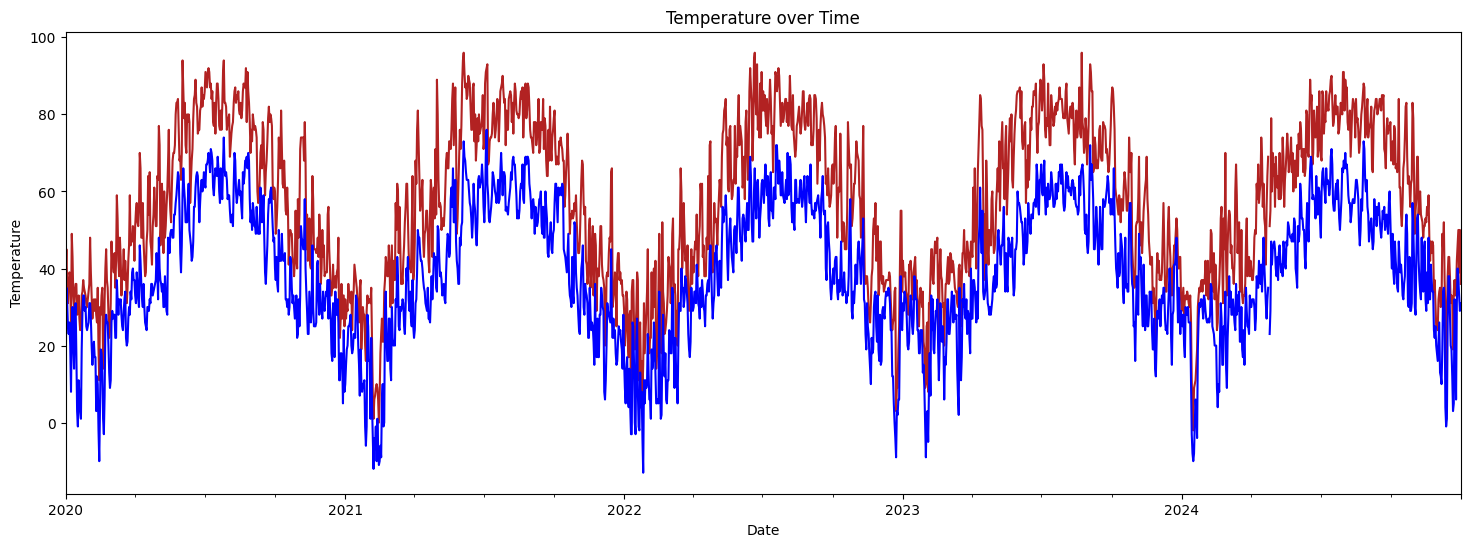

In [14]:
df['max_temp_f'].plot(figsize=(18, 6), color='firebrick', label='Max Temp')
df['min_temp_f'].plot(color='blue', label="Min Temp")
# df['max_dewpoint_f'].plot(color='orange', label='Max Dewpoint', alpha=0.5)
# df['min_dewpoint_f'].plot(color='purple', label='Min Dewpoint', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature over Time")
plt.show()

In [18]:
for col in ['max_temp_f', 'min_temp_f', 'max_dewpoint_f', 'min_dewpoint_f']:
    df[col] = df[col].interpolate(method='linear')


In [25]:
def OLS(X, y):
    XtX = X.T @ X
    Xty = X.T @ y

    return np.linalg.solve(XtX, Xty)

In [42]:
x = np.arange(len(df))
# X = np.column_stack([np.sin(2 * np.pi * x / 365), np.cos(2 * np.pi * x / 365), np.sin(2 * 2 * np.pi * x / 365), np.cos(2 * 2 * np.pi * x / 365), np.ones_like(x)])
X = np.column_stack([np.cos(2 * np.pi * x / 365), np.ones_like(x)])
y = df['max_temp_f'].values

beta = la.lstsq(X, y)[0]


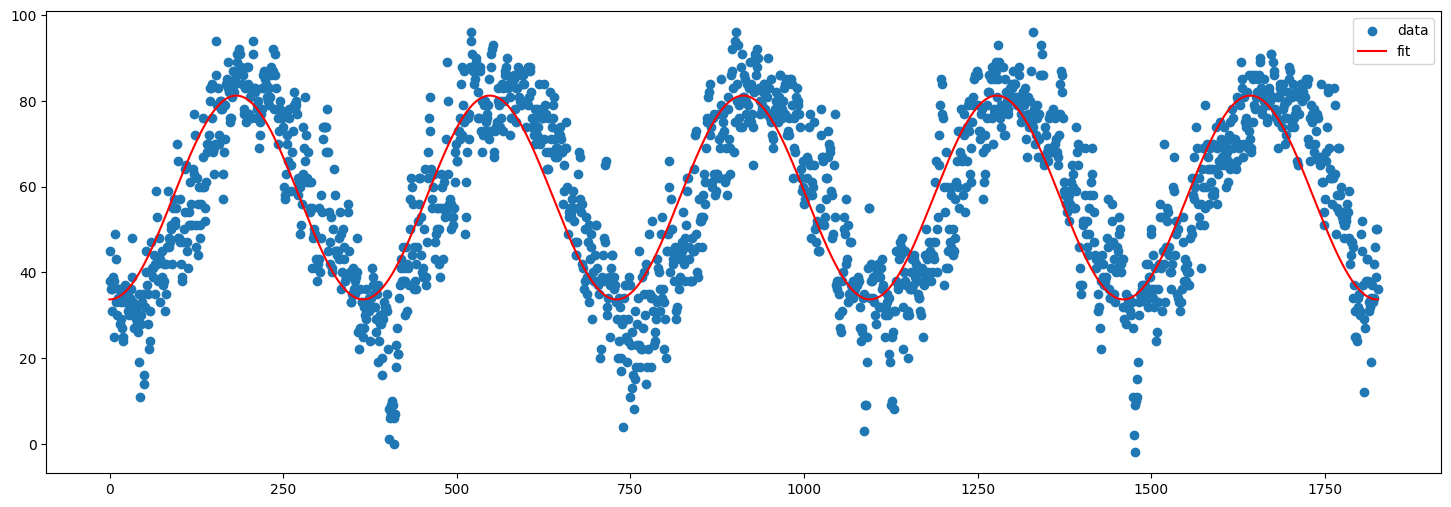

In [43]:
t1, t2 = beta
f = lambda x: t1 * np.cos(2 * np.pi * x / 365) + t2 
t = np.linspace(0, 1826, 18000)
plt.figure(figsize=(18, 6))
plt.scatter(x, y, label='data')
plt.plot(t, f(t), label='fit', color='r')
plt.legend()
plt.show()

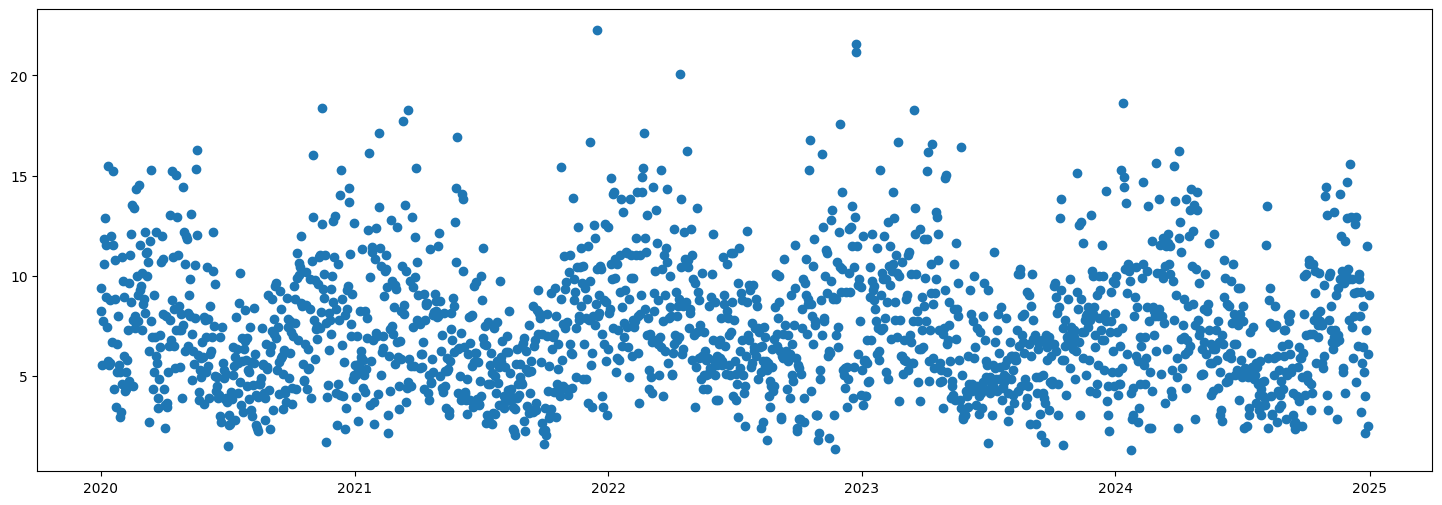

In [50]:
ws = df['avg_wind_speed_kts'].values
plt.figure(figsize=(18, 6))
plt.scatter(df.index, ws)
plt.show()

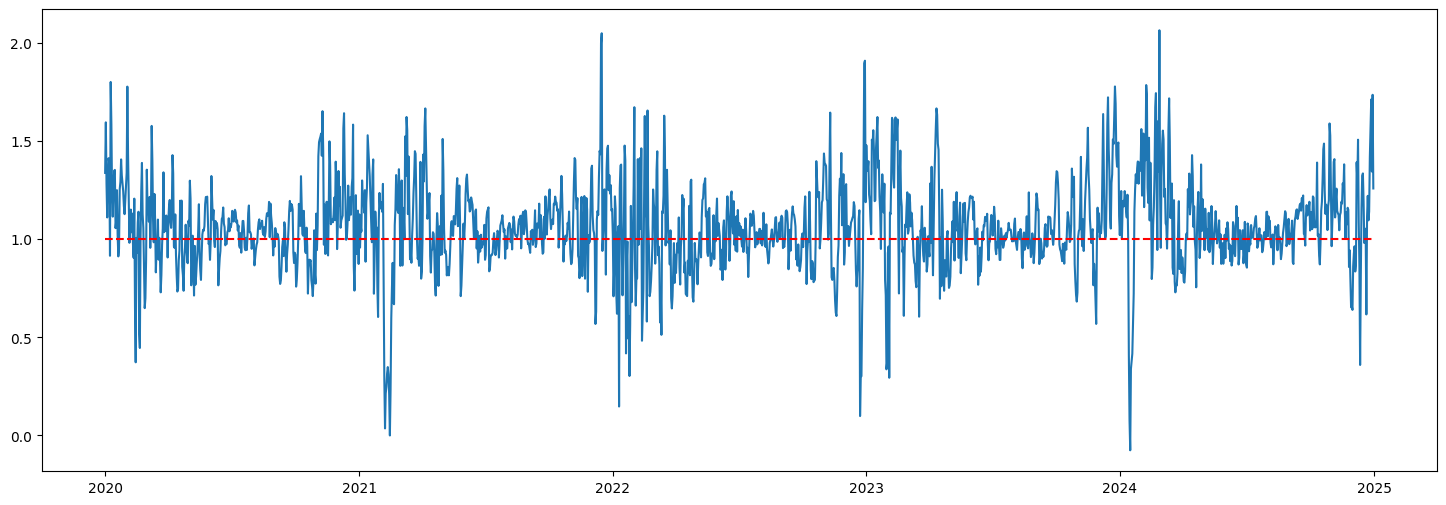

In [54]:
high = df['max_temp_f'].values
climo_high = df['climo_high_f']
plt.figure(figsize=(18, 6))
plt.plot(df.index, high/climo_high)
plt.plot([df.index[0], df.index[-1]], [1, 1], '--r')
plt.show()


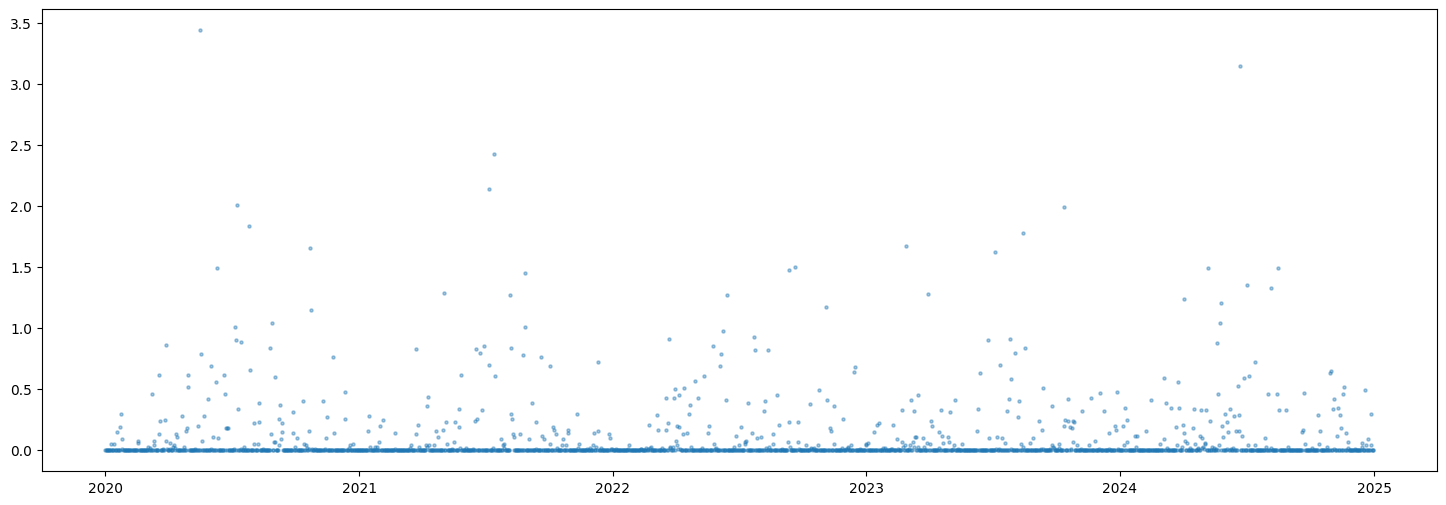

In [58]:
precip = df['precip_in'].values
plt.figure(figsize=(18, 6))
plt.scatter(df.index, precip, s=5, alpha=.4)
plt.show()